
## Analisi di dati da precipitazione

In [ ]:
install.packages('dplyr')
library('dplyr')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Analisi dati processati

In [ ]:
dataPLV_proc = read.table('ProcPLV.txt')
dataSAT_proc = read.table('ProcSAT.txt')
dataGPM_proc = read.table('ProcGPM.txt')
dataERA5_proc = read.table('ProcERA5_alt.txt')


In [ ]:
integral = function(data, hours) {

    prec = c()
    for (i in seq(3, 26-hours+1, hours)) {
        for (j in 1:dim(data)[1]) { 
                row = data[j,i:(i+hours-1)]
                N = length(row[!is.na(row)])
                if (N == 0) {prec = c(prec, NA)}
                else { prec = c(prec, sum(row[!is.na(row)])) }
    }
    }
    return(prec)
}

In [ ]:
hours = 3

precPLV = integral(dataPLV_proc, hours)
precSAT = integral(dataSAT_proc, hours)
precERA5 = integral(dataERA5_proc, hours)
precGPM = integral(dataGPM_proc, hours)

In [ ]:
mask = !is.na(precPLV)

precPLV = precPLV[mask]
precSAT = precSAT[mask]
precERA5 = precERA5[mask]
precGPM = precGPM[mask]

In [ ]:
length(precPLV)
length(precGPM)

[1] 1784

[1] 1784

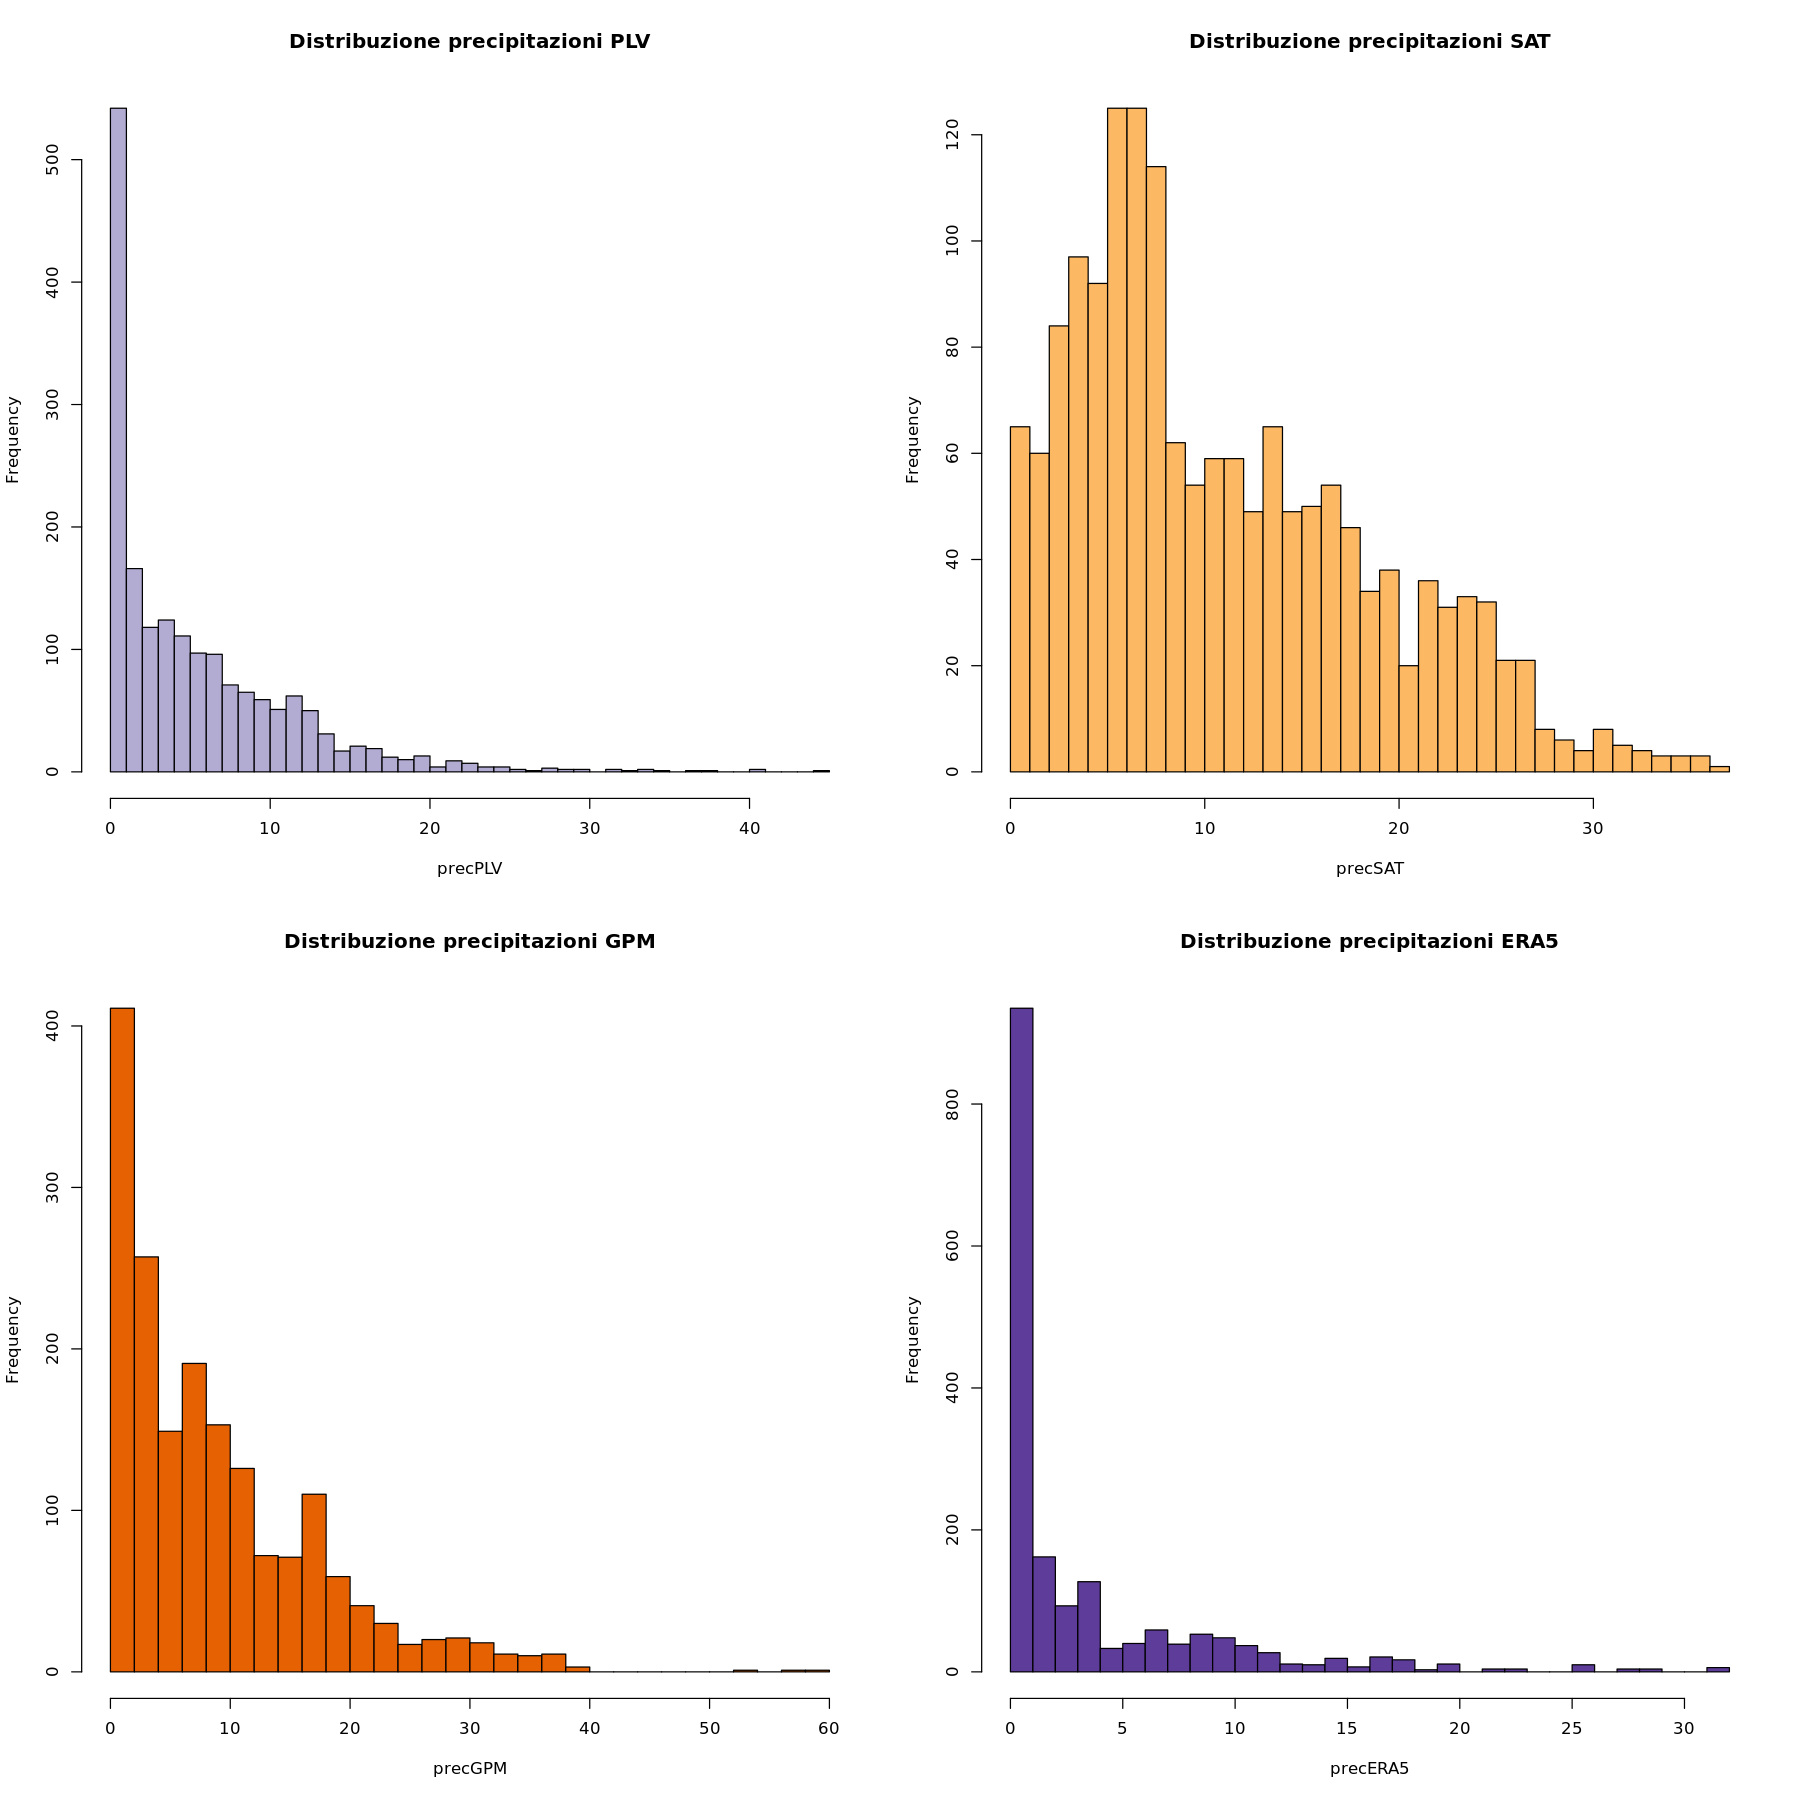

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)
par(mfrow=c(2,2))

colors = c('#b2abd2',
'#fdb863',
'#e66101',
'#5e3c99')


hist_PLV = hist(precPLV, breaks = 40, col = colors[1], main = 'Distribuzione precipitazioni PLV')
#dens_PLV = hist_PLV$counts
dens_PLV = hist_PLV$density

breaks = hist_PLV$breaks
x_PLV = hist_PLV$mids

hist_SAT = hist(precSAT, breaks = 40, col = colors[2], main = 'Distribuzione precipitazioni SAT')
#dens_SAT = hist_SAT$counts
dens_SAT = hist_SAT$density
x_SAT = hist_SAT$mids


hist_GPM = hist(precGPM, breaks = 40, col = colors[3], main = 'Distribuzione precipitazioni GPM')
#dens_GPM = hist_GPM$counts
dens_GPM = hist_GPM$density
x_GPM = hist_GPM$mids


hist_ERA5 = hist(precERA5, breaks = 40, col = colors[4], main = 'Distribuzione precipitazioni ERA5')
#dens_ERA5 = hist_ERA5$counts
dens_ERA5 = hist_ERA5$density
x_ERA5 = hist_ERA5$mids




In [ ]:
pdf("PDF_IV.pdf", width=7, height=7)
options(repr.plot.width = 7, repr.plot.height = 7)


plot(x_PLV, dens_PLV, col = colors[1], lwd = 2, type = 'l',
    main = 'PDF dei dati di precipitazione', xlab = 'Tasso di precipitazione (mm/h)',
    ylab = 'Densità (scala logaritmica)', yaxt='n',
    log = 'y')

grid()
lines(x_SAT, dens_SAT, col = colors[2], lwd = 2)
lines(x_GPM, dens_GPM, col = colors[3], lwd = 2)
lines(x_ERA5, dens_ERA5, col = colors[4], lwd = 2)

axis(2, at = c(1e-03, 1e-02, 1e-01, 1))

legend('topright', legend = c('PLV', 'SAT', 'GPM', 'ERA5'), 
        col = colors,
        lwd = 2, bty = 'n', y.intersp = 1.2)

dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“7 y values <= 0 omitted from logarithmic plot”


png 
  2

## Indici continui

In [ ]:
MeanError <- function(data, prec) {
            a = 0
            for (i in 1:length(data)) { a = a + (data[i] - prec[i]) }
            a = a/length(data)
            return(a)
}

MeanAbsError <- function(data, prec) {
            a=0
            for (i in 1:length(data)) { a = a + abs(data[i] - prec[i]) }
            a = a/length(data)
            return(a)
}

RootMeanSquareError <- function(data, prec) {
            a=0
            for (i in 1:length(data)) { a = a + (data[i] - prec[i])^2 }
            a = sqrt(a/length(data))
            return(a)
}

FracStanError <- function(data, prec) {
            a=0
            for (i in 1:length(data)) { 
                b = (data[i] - prec[i])^2
                if ( b != 0 ) { a = (a + b/((prec[i])^2))}}
            a = sqrt(a/length(data))
            return(a)
}

CoeffVar <- function(data, prec) {
            a=0
            b=0
            for (i in 1:length(data)) { a = a + (data[i] - prec[i])^2
                                        b = b + (data[i])^2 }
            a = a/b
            return(a)
}


In [ ]:
#Calcolo tutti indici continui

IndexC <- function(data, dataref, a="s") {

        if (a == 'SAT') {
        data = data[!is.na(precSAT)]
        dataref2 = dataref[!is.na(precSAT)]
        #index = c(MeanError(data, dataref2), MeanAbsError(data, dataref2), RootMeanSquareError(data, dataref2),FracStanError(data, dataref2), CoeffVar(data, dataref2), cor(data, dataref2))
        index = c(MeanError(data, dataref2), MeanAbsError(data, dataref2), RootMeanSquareError(data, dataref2), CoeffVar(data, dataref2), cor(data, dataref2))
        }
        else {
        #index = c(MeanError(data, dataref), MeanAbsError(data, dataref), RootMeanSquareError(data, dataref),FracStanError(data, dataref), CoeffVar(data, dataref), cor(data, dataref))
        index = c(MeanError(data, dataref), MeanAbsError(data, dataref), RootMeanSquareError(data, dataref), CoeffVar(data, dataref), cor(data, dataref))
        }

        
        return(index)
}


In [ ]:
indexGPM_PLV = IndexC(precGPM, precPLV)
indexERA5_PLV = IndexC(precERA5, precPLV)
indexSAT_PLV = IndexC(precSAT, precPLV, 'SAT')

indexGPM_SAT = IndexC(precSAT, precGPM, 'SAT')
indexERA5_SAT = IndexC(precSAT, precERA5, 'SAT')

indexGPM_ERA5 = IndexC(precGPM, precERA5, 'SAT')


In [ ]:
index <- matrix(as.numeric(c(indexERA5_PLV, indexGPM_PLV, indexSAT_PLV, indexGPM_SAT, indexERA5_SAT, indexGPM_ERA5)), 5, 6)
colnames(index) <- c("ERA5 - PLV", "GPM - PLV", "SAT - PLV", "GPM - SAT", "ERA5 - SAT", "GPM - ERA5")
#rownames(index) <- c("ME", "MAE", "RMS", "FSE", "CV", "r")
rownames(index) <- c("ME", "MAE", "RMS", "CV", "r")

print(index)

    ERA5 - PLV GPM - PLV SAT - PLV GPM - SAT ERA5 - SAT GPM - ERA5
ME  -1.9025641 3.6004190 5.2759372 1.2174707  7.2329682  6.0154975
MAE  4.7962280 5.4515637 7.3054842 6.7006850  8.4315829  7.7261503
RMS  6.9584850 7.9038287 9.6808548 8.8663159 11.2235244 10.3424852
CV   1.1836835 0.4097307 0.5252358 0.4405684  0.7059686  0.6385904
r    0.3156413 0.5788787 0.3231275 0.4145051  0.1868265  0.3475375


In [ ]:
install.packages('RColorBrewer')
library('RColorBrewer')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('pheatmap')
library('pheatmap')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
index[,1:3]

,ERA5 - PLV,GPM - PLV,SAT - PLV
ME,-1.9025641,3.6004190,5.2759372
MAE,4.7962280,5.4515637,7.3054842
RMS,6.9584850,7.9038287,9.6808548
CV,1.1836835,0.4097307,0.5252358
r,0.3156413,0.5788787,0.3231275


In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4)
pdf('indici_continui1_IV.pdf', width = 5, height = 4)
rf = colorRampPalette(rev(brewer.pal(5,'Spectral')))
r <- rf(100)
pheatmap(index[,1:3], display_numbers = T, color = r,
        cluster_rows = F, cluster_cols = F,
        main = 'Indici continui rispetto a valore di riferimento (PLV)',
        angle_col = 0,
        fontsize_number = 20,
        fontsize_col = 17,
        fontsize_row = 17,
        labels_col = c('ERA5', 'GPM', 'SAT'),
        fontsize = 14,
        legend = F, filename = 'indici_continui1_IV.pdf'
        )


In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4)
rf = colorRampPalette(rev(brewer.pal(5,'Spectral')))
r <- rf(100)
pheatmap(index[,4:6], display_numbers = T, color = r,
        cluster_rows = F, cluster_cols = F,
        main = 'Indici continui tra i campi stimati',
        angle_col = 0,
        fontsize_number = 20,
        fontsize_col = 17,
        fontsize_row = 17,
        #labels_col = c('ERA5', 'GPM', 'SAT'),
        fontsize = 14,
        legend = F, filename = 'indici_continui2_IV.pdf'
        )


### Scatterplot

In [ ]:
install.packages('RColorBrewer')
library('RColorBrewer')
install.packages('ggplot2')
library('ggplot2')

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
pdf("PLV_GPM.pdf", width= 10, height= 10)
#par(mar=c(1, 0.1, 0.1, 0.1))
PLV_GPM <- ggplot(data.frame(precPLV, precGPM), aes(x = precPLV, y = precGPM))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                   # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione GPM e PLV"),
                x = "PLV (mm/h)",
                y = "GPM (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot")
PLV_GPM
dev.off()

pdf("PLV_SAT.pdf", width= 10, height= 10)
PLV_SAT <- ggplot(data.frame(precPLV, precSAT), aes(x = precPLV, y = precSAT))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                         # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione SAT e PLV"),
                x = "PLV (mm/h)",
                y = "SAT (mm/h)", 
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

PLV_SAT
dev.off()

pdf("PLV_ERA5.pdf", width= 10, height= 10)
PLV_ERA5 <- ggplot(data.frame(precPLV, precERA5), aes(x = precPLV, y = precERA5))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                       # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione ERA5 e PLV"),
                x = "PLV (mm/h)",
                y = "ERA5 (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

PLV_ERA5
dev.off()

pdf("GPM_ERA5.pdf", width= 10, height= 10)
GPM_ERA5 <- ggplot(data.frame(precGPM, precERA5), aes(x = precGPM, y = precERA5))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                         # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione ERA5 e GPM"),
                x = "GPM (mm/h)",
                y = "ERA5 (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

GPM_ERA5
dev.off()

pdf("SAT_ERA5.pdf", width= 10, height= 10)
SAT_ERA5 <- ggplot(data.frame(precSAT, precERA5), aes(x = precSAT, y = precERA5))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                   # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione ERA5 e SAT"),
                x = "SAT (mm/h)",
                y = "ERA5 (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

SAT_ERA5
dev.off()

pdf("SAT_GPM.pdf", width= 10, height= 10)
SAT_GPM <- ggplot(data.frame(precSAT, precGPM), aes(x = precSAT, y = precGPM))+
        ylim(-0.1,30)+ xlim(-0.1, 35) +                                 # range sugli assi
        coord_cartesian(expand = FALSE) +
        stat_bin2d(bins=c(150,150),binwidth=c(0.3,0.3)) +   # qui imposto larghezza e numero di bin
        scale_fill_gradientn(colours = rev(brewer.pal(9, "Spectral")),  # qui si possono modificare tutti i colori a piacimento
                       trans = "log10") +                  # qui imposto la scala logaritmica
        labs(title = paste("Correlazione precipitazione GPM e SAT"),
                x = "SAT (mm/h)",
                y = "GPM (mm/h)",
                fill = 'Conteggi') +
         theme(plot.title = element_text(hjust = 0.7, size=35),
        panel.background = element_blank(),
        panel.grid = element_blank(),
        panel.border = element_blank(), 
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 15),
        axis.line = element_line(),
        legend.text = element_text(size= 15),
        legend.title = element_text(size = 18),
        plot.title.position = "plot"
       )

SAT_GPM
dev.off()

Warning message:
“Removed 61 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 63 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 195 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 58 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 11 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 57 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 27 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 39 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 174 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 35 rows containing missing values (geom_tile).”


png 
  2

Warning message:
“Removed 224 rows containing non-finite values (stat_bin2d).”
Warning message:
“Removed 9 rows containing missing values (geom_tile).”


png 
  2

## Indici discreti

In [ ]:
count <- function(data, threshold) {

        counts = cbind(0,0,0,0,0)
        #hit, miss, false alarm, correct rejection, total
        for(i in 1:length(data)) { 
            if(precPLV[i] > threshold) {
                if(data[i] > threshold && !is.na(data[i])) {counts[1] = counts[1]+1
            } else {counts[2] = counts[2]+1}
            } else {
                if(data[i] > threshold && !is.na(data[i])) {counts[3] = counts[3]+1
                } else {counts[4] = counts[4]+1}
            }
        }
        counts[5] = length(data)

        return(counts)
}

IndexD <- function(count) {

    PC = (count[1]+count[4])/count[5]
    POD = count[1]/(count[1]+count[2])
    FAR = count[3]/(count[3]+count[1])
    CSI = count[1]/(count[1]+count[2]+count[3])
    hitR = (count[1]+count[2])*(count[1]+count[3])/count[5]
    ETS = (count[1]-hitR)/(count[1]+count[2]+count[3]-hitR)

    return(c(PC, POD, FAR, CSI, ETS))
}

In [ ]:
indexD_GPM = c()
indexD_ERA5 = c()
indexD_SAT = c()

In [ ]:
threshold = c(0.1, 0.25, 0.6, 1.5, 2.5, 5, 10, 12, 15, 20, 30, 40)

for (i in 1:length(threshold)) {
#calcolo tabella di contingenza
precGPM_c = count(precGPM, threshold[i])
precERA5_c = count(precERA5, threshold[i])
precSAT_c = count(precSAT, threshold[i])

#stampa tabella di contingenza
counts <- matrix(as.numeric(c(precGPM_c, precERA5_c, precSAT_c)), 5, 3)
colnames(counts) <- c("GPM", "ERA5", "SAT")
rownames(counts) <- c("hit", "miss", "false alarm", "correct rejection", "total")
cat(paste0("Tabella di contingenza con soglia ", threshold[i], '\n'))
print(counts)
cat('\n')

#calcolo indici discreti
indexD_GPM = cbind(indexD_GPM, IndexD(precGPM_c))
indexD_ERA5 = cbind(indexD_ERA5, IndexD(precERA5_c))
indexD_SAT = cbind(indexD_SAT, IndexD(precSAT_c))

#stampa indici
indexD <- matrix(as.numeric(c(indexD_GPM[,i], indexD_ERA5[,i], indexD_SAT[,i])), 5, 3)
colnames(indexD) <- c("GPM", "ERA5", "SAT")
rownames(indexD) <- c("PC", "POD", "FAR", "CSI", "ETS")
cat(paste0("Indici discreti con soglia ", threshold[i], "\n"))
print(indexD)
cat(paste0("-----------------------------", "\n"))
}

colnames(indexD_GPM) = threshold
colnames(indexD_ERA5) = threshold
colnames(indexD_SAT) = threshold

Tabella di contingenza con soglia 0.1
                   GPM ERA5  SAT
hit               1421 1019 1384
miss                66  468  103
false alarm        240  191  236
correct rejection   57  106   61
total             1784 1784 1784

Indici discreti con soglia 0.1
          GPM       ERA5        SAT
PC  0.8284753 0.63060538 0.80997758
POD 0.9556153 0.68527236 0.93073302
FAR 0.1444913 0.15785124 0.14567901
CSI 0.8228141 0.60727056 0.80325015
ETS 0.1066293 0.01559598 0.09041468
-----------------------------
Tabella di contingenza con soglia 0.25
                   GPM ERA5  SAT
hit               1346  878 1323
miss                83  551  106
false alarm        273  176  284
correct rejection   82  179   71
total             1784 1784 1784

Indici discreti con soglia 0.25
          GPM       ERA5        SAT
PC  0.8004484 0.59248879 0.78139013
POD 0.9419174 0.61441568 0.92582225
FAR 0.1686226 0.16698292 0.17672682
CSI 0.7908343 0.54704050 0.77232925
ETS 0.1213488 0.04434721 0.08403097


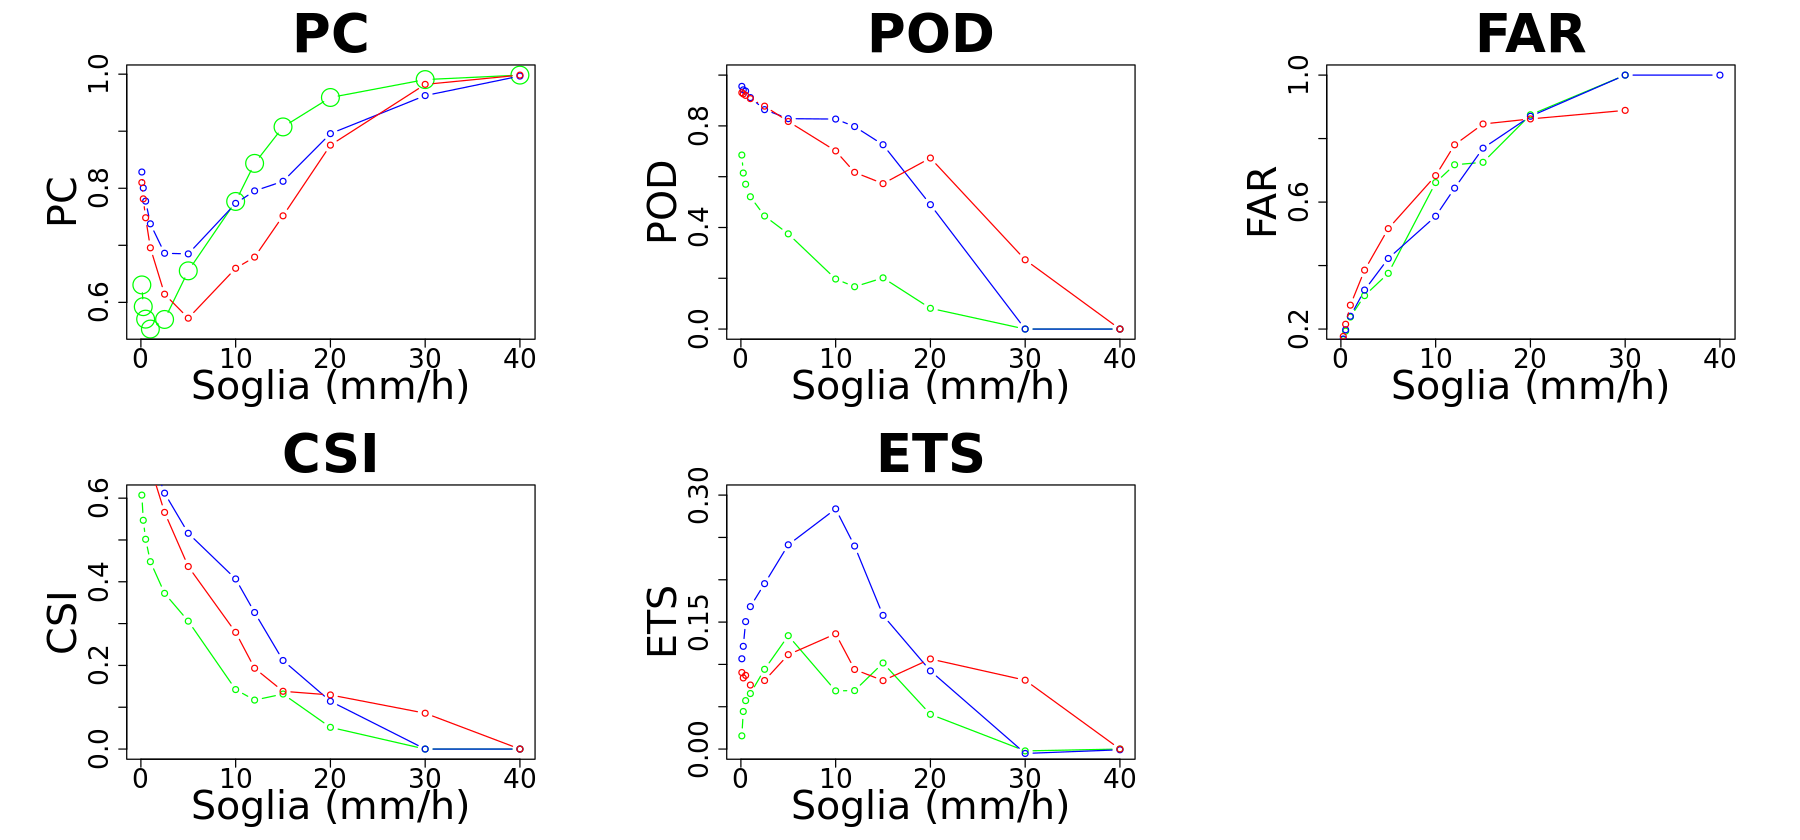

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow = c(2,3), mar =c(5.1,8,4.1,4.1))
#par(mfrow = c(1,2), mar =c(5.1,8,4.1,4.1))


plot(threshold, indexD_ERA5[1,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'PC', main = "PC", cex.main = 4, col = "green",
     cex=3, cex.axis = 2, cex.lab = 3)
lines(threshold, indexD_GPM[1,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[1,], col = "red", type = 'b')
#legend(x='topleft', legend= c('ERA5', 'GPM', 'SAT'), bty = 'n', col = c('red', 'blue', 'green'), lwd = 1, cex = 0.5 )

plot(threshold, indexD_ERA5[2,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'POD', main = "POD", cex.main = 4, col = "green",
    cex.axis = 2, cex.lab = 3, ylim = c(0,1))
lines(threshold, indexD_GPM[2,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[2,], col = "red", type = 'b')

plot(threshold, indexD_ERA5[3,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'FAR', main = "FAR", cex.main = 4, col = "green",
     cex.axis = 2, cex.lab = 3, ylim = c(0.2,1))
lines(threshold, indexD_GPM[3,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[3,], col = "red", type = 'b')

plot(threshold, indexD_ERA5[4,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'CSI', main = "CSI", cex.main = 4, col = "green",
     cex.axis = 2, cex.lab = 3)
lines(threshold, indexD_GPM[4,], col = "blue", type = 'b' )
lines(threshold, indexD_SAT[4,], col = "red", type = 'b')

plot(threshold, indexD_ERA5[5,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'ETS', main = "ETS", cex.main = 4, col = "green",
    cex.axis = 2, cex.lab = 3, ylim = c(0,0.3))
lines(threshold, indexD_GPM[5,], col = "blue", type = 'b')
lines(threshold, indexD_SAT[5,], col = "red", type = 'b')

#dev.off()

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 7)
#par(mfrow = c(2,3), mar =c(5.1,8,4.1,4.1))
pdf('indici_discreti1_IV.pdf', width = 18, height = 7)
par(mfrow = c(1,2), mar =c(5.1,8,4.1,4.1))

plot(threshold, indexD_ERA5[2,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'POD', main = "Probability of Detection", cex.main = 3, col = colors[4],
    cex.axis = 2, cex.lab = 2, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[2,], col = colors[3], type = 'b', lwd = 3)
lines(threshold, indexD_SAT[2,], col = colors[2], type = 'b', lwd = 3)

plot(threshold, indexD_ERA5[3,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'FAR', main = "False Alarm Rate", cex.main = 3, col = colors[4],
     cex.axis = 2, cex.lab = 2, ylim = c(0.2,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[3,], col = colors[3], type = 'b', lwd = 3)
lines(threshold, indexD_SAT[3,], col = colors[2], type = 'b', lwd = 3)
#legend('bottomright', legend = c('SAT', 'GPM', 'ERA5'), col = colors[2:4], bty = 'n')

par(fig = c(0, 1, 0, 1), oma = c(4,1, 2, 2), mar = c(1, 1, 1, 2), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('bottomright', legend = c('SAT', 'GPM', 'ERA5'), 
        col = colors[2:4], bty = 'n', cex=2, lwd=3)

dev.off()


png 
  2

In [ ]:
options(repr.plot.width = 27, repr.plot.height = 7)

pdf('indici_discreti2_IV.pdf', width = 27, height = 7)
par(mfrow = c(1,3), mar =c(10,8,4.1,4.1))

plot(threshold, indexD_ERA5[1,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'PC', main = "Percent Correct", cex.main = 4, col = colors[4],
     cex.axis = 2.5, cex.lab = 2.5, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[1,], col = colors[3], type = 'b', lwd = 3 )
lines(threshold, indexD_SAT[1,], col = colors[2], type = 'b', lwd = 3)

plot(threshold, indexD_ERA5[4,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'CSI', main = "Critical Success Index", cex.main = 4, col = colors[4],
     cex.axis = 2.5, cex.lab = 2.5, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[4,], col = colors[3], type = 'b', lwd = 3 )
lines(threshold, indexD_SAT[4,], col = colors[2], type = 'b', lwd = 3)

plot(threshold, indexD_ERA5[5,], type = 'b', xlab = 'Soglia (mm/h)', ylab = 'ETS', main = "Equitable Threat Score", cex.main = 4, col = colors[4],
    cex.axis = 2.5, cex.lab = 2.5, ylim = c(0,1), lwd = 3)
grid()
lines(threshold, indexD_GPM[5,], col = colors[3], type = 'b', lwd = 3)
lines(threshold, indexD_SAT[5,], col = colors[2], type = 'b', lwd = 3)

par(fig = c(0, 1, 0, 1), oma = c(7,1, 4, 0), mar = c(1, 1, 1, 4), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('topright', legend = c('SAT', 'GPM', 'ERA5'), 
        col = colors[2:4], bty = 'n', cex=3, lwd=3)
dev.off()

png 
  2

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=97041d7f-a092-4add-8b94-91c21b1dd7af' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>